## 1. Business Understanding

This Jupyter Notebook is dedicated to the analysis of Airbnb data in Boston. We will explore various aspects of this dataset to gain insights into the Boston Airbnb market, including pricing trends, property types, neighborhood popularity, and more.

We will use kaggle dataset for airBnb Boston Data.

Our goal is to provide valuable information and actionable insights for both hosts and travelers within the Boston Airbnb. We will explore the most popular destinations, uncover the preferred types of accommodations and decode the pricing dynamics.

Through data visualization and statistical analysis, we will aim to provide data-driven answers to these questions below:
1. What are the most popular destinations in Boston?
2. What are the most popular property type?
3. How does pricing vary across neighborhoods?
4. How does pricing vary across different property types?
5. Which months of the year have the highest volume of rentals?
6. How has the number of listings evolved over the years?
7. How the price changes over the years?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Data Loading and Exploration
In this step, We will load our data and get some insights about column names, column types and summary about this dataset

In [2]:
listings = pd.read_csv('listings.csv')
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## 3. Data preparation and preprocessing

In [6]:
cols = ['id','host_id', 'neighbourhood_cleansed', 'property_type','price', 'host_since','room_type','bedrooms', 'bathrooms', 'last_review']
listings_filtered = listings[cols].copy()
listings_filtered['price_formatted'] = listings_filtered.price.apply(lambda a: float(a.replace('$', '').replace(',', '')))
listings_filtered['host_since']= pd.to_datetime(listings_filtered['host_since'])
listings_filtered['last_review']= pd.to_datetime(listings_filtered['last_review'])

listings_filtered.head()

,id,host_id,neighbourhood_cleansed,property_type,price,host_since,room_type,bedrooms,bathrooms,last_review,price_formatted
0,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0
1,3075044,2572247,Roslindale,Apartment,$65.00,2012-06-07,Private room,1.0,1.0,2016-08-13,65.0
2,6976,16701,Roslindale,Apartment,$65.00,2009-05-11,Private room,1.0,1.0,2016-08-05,65.0
3,1436513,6031442,Roslindale,House,$75.00,2013-04-21,Private room,1.0,1.0,2016-08-28,75.0
4,7651065,15396970,Roslindale,House,$79.00,2014-05-11,Private room,1.0,1.5,2016-09-01,79.0


In [7]:
calendar['date']= pd.to_datetime(calendar['date'])
calendar['year'] = calendar.date.dt.year
calendar['month_number'] = calendar.date.dt.month
calendar['month'] = calendar.date.dt.month_name()
calendar.head()

,listing_id,date,available,price,year,month_number,month
0,12147973,2017-09-05,f,NaN,2017,9,September
1,12147973,2017-09-04,f,NaN,2017,9,September
2,12147973,2017-09-03,f,NaN,2017,9,September
3,12147973,2017-09-02,f,NaN,2017,9,September
4,12147973,2017-09-01,f,NaN,2017,9,September


In [8]:
reservations_details = calendar.drop(['price', 'available'], axis=1).merge(listings_filtered, left_on='listing_id', right_on='id')
reservations_details.head()

,listing_id,date,year,month_number,month,id,host_id,neighbourhood_cleansed,property_type,price,host_since,room_type,bedrooms,bathrooms,last_review,price_formatted
0,12147973,2017-09-05,2017,9,September,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0
1,12147973,2017-09-04,2017,9,September,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0
2,12147973,2017-09-03,2017,9,September,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0
3,12147973,2017-09-02,2017,9,September,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0
4,12147973,2017-09-01,2017,9,September,12147973,31303940,Roslindale,House,$250.00,2015-04-15,Entire home/apt,2.0,1.5,NaT,250.0


## 4. Questions & Results
1. What are the most popular destinations in Boston?
2. What are the most popular property type?
3. How does pricing vary across neighbourhoods?
4. How does pricing vary across different property types?
5. Which months of the year have the highest volume of reservations?
6. How has the number of listings evolved over the years?
7. How the price changes over the years?


Through data visualization and statistical analysis, we will aim to provide data-driven answers to these questions and more. 

In [9]:
def plot(df, title, x_label, y_label, plot_kind='bar', marker=None):
    
    '''
    INPUT 
        df - a dataframe holding the data
        title - string the title of your plot
        x_label - string label if x-axis
        y_label - string label if y-axis
        plot_kind - string kind of plot chart
        marker - string marker style
        
    OUTPUT
        Displays a plot chart of certain data.
    '''

    if plot_kind == 'bar':
        df.plot(kind=plot_kind)
    else:
        df.plot(kind=plot_kind, marker=marker)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### 1. What are the most popular destinations in Boston?

In [10]:
top_neighbourhood_by_count = reservations_details['neighbourhood_cleansed'].value_counts()
top_neighbourhood_by_count.head()

neighbourhood_cleansed
Jamaica Plain    125195
South End        118990
Back Bay         110230
Fenway           105850
Dorchester        98185
Name: count, dtype: int64

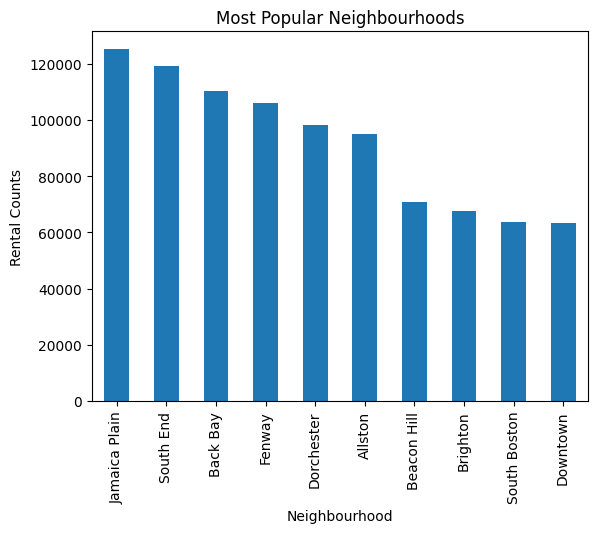

In [11]:
plot(top_neighbourhood_by_count.head(10), 'Most Popular Neighbourhoods', 'Neighbourhood', 'Rental Counts')

- This bar chart highlights the neighbourhoods with the highest number of listings. 
- It allows you to identify popular areas for Airbnb rentals.

In [12]:
print(f"We can find that the most 5 popular destination are {top_neighbourhood_by_count.index[:5].to_list()}")

We can find that the most 5 popular destination are ['Jamaica Plain', 'South End', 'Back Bay', 'Fenway', 'Dorchester']


### 2. What are the most popular property type?


In [13]:
top_property_types = reservations_details['property_type'].value_counts()
top_property_types.head()

property_type
Apartment          953745
House              205130
Condominium         84315
Townhouse           19710
Bed & Breakfast     14965
Name: count, dtype: int64

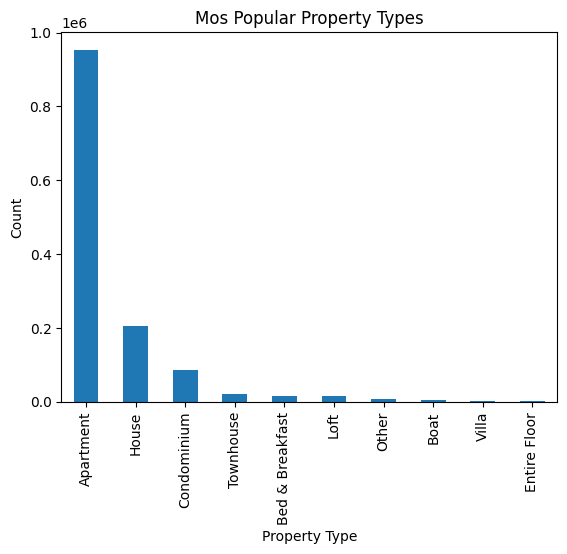

In [14]:
plot(top_property_types.head(10), 'Mos Popular Property Types', 'Property Type', 'Count')

- This bar chart highlights the property types with the highest number of listings. 
- It allows you to identify popular property types for Airbnb rentals.

In [15]:
print(f"We can find that the most 5 popular property type in reservations are {top_property_types.index[:5].to_list()}")

We can find that the most 5 popular property type in reservations are ['Apartment', 'House', 'Condominium', 'Townhouse', 'Bed & Breakfast']


### 3. How does pricing vary across neighbourhood?

In [16]:
neighbourhood_vs_price = listings_filtered.groupby(['neighbourhood_cleansed'])['price_formatted'].agg(['count', 'sum', 'mean']).reset_index().sort_values(['mean', 'sum'], ascending=False)
neighbourhood_vs_price = neighbourhood_vs_price.set_index('neighbourhood_cleansed')
neighbourhood_vs_price.head()

,count,sum,mean
neighbourhood_cleansed,,,
South Boston Waterfront,83,25403.0,306.060241
Bay Village,24,6404.0,266.833333
Leather District,5,1268.0,253.600000
Back Bay,302,72767.0,240.950331
Downtown,172,40671.0,236.459302


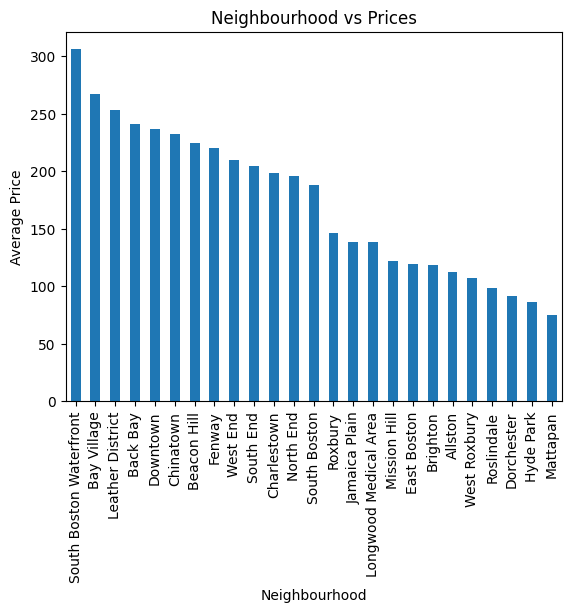

In [17]:
plot(neighbourhood_vs_price['mean'], 'Neighbourhood vs Prices', 'Neighbourhood', 'Average Price')

- This bar chart highlights the neighborhoods with the highest prices. 
- It allows you to identify the most expensive areas in Boston.

In [18]:
print(f"Looking into the average price of each neighbourhood, We can find that the most 5 expensive neighbourhoods are {neighbourhood_vs_price.index[:5].to_list()}")

Looking into the average price of each neighbourhood, We can find that the most 5 expensive neighbourhoods are ['South Boston Waterfront', 'Bay Village', 'Leather District', 'Back Bay', 'Downtown']


### 4. How does pricing vary across different property types?

In [19]:
propertytype_vs_price = listings_filtered.groupby(['property_type'])['price_formatted'].agg(['count', 'sum', 'mean']).reset_index().sort_values(['mean', 'sum'], ascending=False)
propertytype_vs_price = propertytype_vs_price.set_index('property_type')
propertytype_vs_price

,count,sum,mean
property_type,,,
Guesthouse,1,289.0,289.000000
Boat,12,3226.0,268.833333
Other,17,3909.0,229.941176
Condominium,231,43947.0,190.246753
Villa,6,1137.0,189.500000
Loft,39,7231.0,185.410256
Apartment,2612,475297.0,181.966692
Townhouse,54,8048.0,149.037037
House,562,73959.0,131.599644


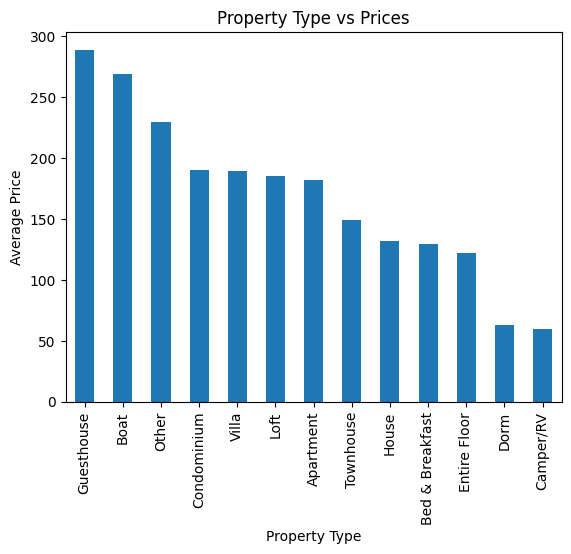

In [20]:
plot(propertytype_vs_price['mean'], 'Property Type vs Prices', 'Property Type', 'Average Price')

- This bar chart highlights the property types with the highest prices. 
- It allows you to identify the most expensive property types in rentals.

In [21]:
print(f"Looking into the average price of each property type, We can find that the most 5 expensive property types are {propertytype_vs_price.index[:5].to_list()}")

Looking into the average price of each property type, We can find that the most 5 expensive property types are ['Guesthouse', 'Boat', 'Other', 'Condominium', 'Villa']


### 5. Which months of the year have the highest volume of rentals?

In [22]:
month_grouping = reservations_details.groupby(['month_number','month']).size().reset_index(name='count')
month_grouping = month_grouping.set_index('month')
month_grouping.head()


,month_number,count
month,,
January,1,111166
February,2,100408
March,3,111166
April,4,107580
May,5,111166


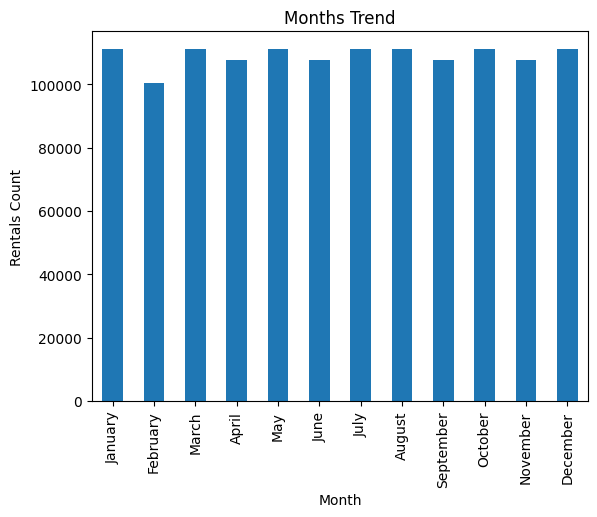

In [23]:
plot(month_grouping['count'], 'Months Trend', 'Month', 'Rentals Count')

- This chart shows Number of rentals over months. It helps identify trend over the year.
- We can fine that there's no certain trend over the year

### 6. How has the number of listings evolved over the years?

In [24]:
listings_filtered['host_since_year'] = listings_filtered.host_since.dt.year
listings_overtime = listings_filtered.groupby(['host_since_year']).size().cumsum().reset_index(name='n_listings').sort_values(['host_since_year'])
listings_overtime = listings_overtime.set_index('host_since_year')
listings_overtime

,n_listings
host_since_year,
2008,3
2009,113
2010,208
2011,430
2012,730
2013,1305
2014,2141
2015,3152
2016,3585


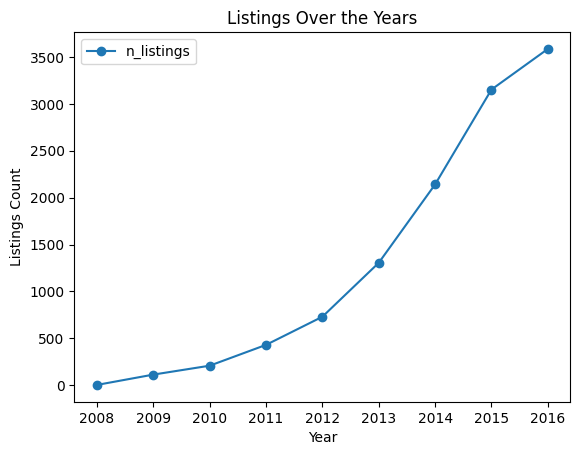

In [25]:
plot(listings_overtime, 'Listings Over the Years', 'Year', 'Listings Count', 'line', 'o')

- This line chart shows how the number of listings changes over years. 
- We can find that the number of listings increases exponentially

### 7. How the price changes over the years?

In [26]:
prices_overtime_annualy = listings_filtered.groupby(listings_filtered['last_review'].dt.to_period("Y"))['price_formatted'].mean()
prices_overtime_annualy.head()

last_review
2010    284.000000
2011    249.000000
2012    244.000000
2013    280.666667
2014    198.064516
Freq: A-DEC, Name: price_formatted, dtype: float64

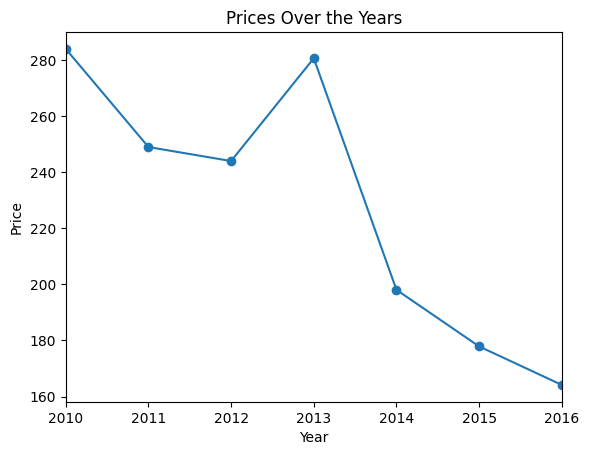

In [27]:
plot(prices_overtime_annualy, 'Prices Over the Years', 'Year', 'Price', 'line', 'o')

In [28]:
prices_overtime= listings_filtered.groupby(listings_filtered['last_review'].dt.to_period("M"))['price_formatted'].mean()
prices_overtime.head()

last_review
2010-10    309.0
2010-11    259.0
2011-09    249.0
2012-05    199.0
2012-11    289.0
Freq: M, Name: price_formatted, dtype: float64

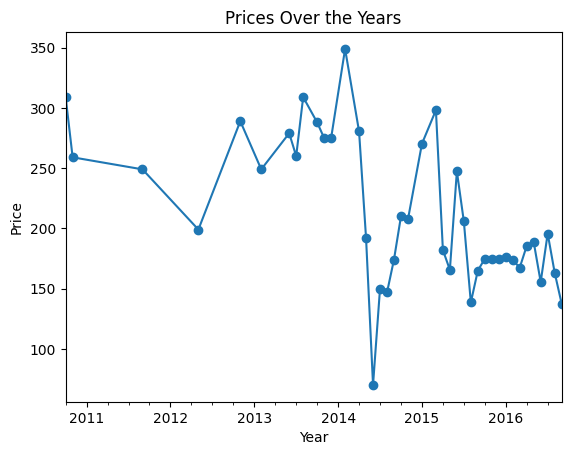

In [29]:
plot(prices_overtime, 'Prices Over the Years', 'Year', 'Price', 'line', 'o')

- These line charts display the average price of listings over years. 
- It helps to understand price trends and seasonality.